Pretty good example I think I can build off of:
https://www.kaggle.com/code/elizabethmaciasphd/abalone-rings-multiple-linear-regression/input

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
file_path = '/kaggle/input/abalone/train.csv'
train_df = pd.read_csv(file_path)

In [4]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [6]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
train_df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


(array([1.5000e+01, 1.4600e+02, 6.9500e+02, 1.4740e+03, 2.9070e+03,
        4.9880e+03, 8.6210e+03, 8.3300e+03, 1.1432e+04, 1.5444e+04,
        1.4920e+04, 1.0863e+04, 5.9250e+03, 3.4990e+03, 9.4900e+02,
        3.5100e+02, 4.0000e+01, 6.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 , 0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255,
        0.27 , 0.285, 0.3  ]),
 <BarContainer object of 20 artists>)

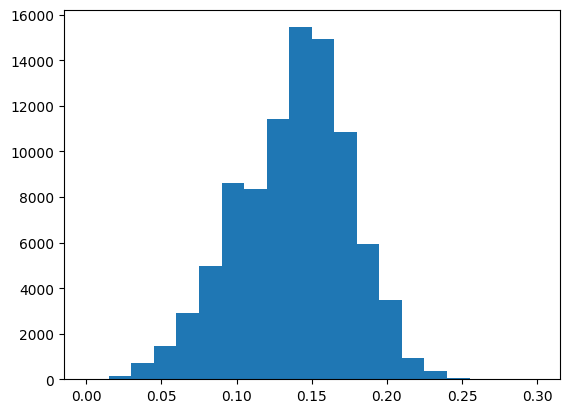

In [9]:
plt.hist(train_df.Height, range=[0.0, 0.3], bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

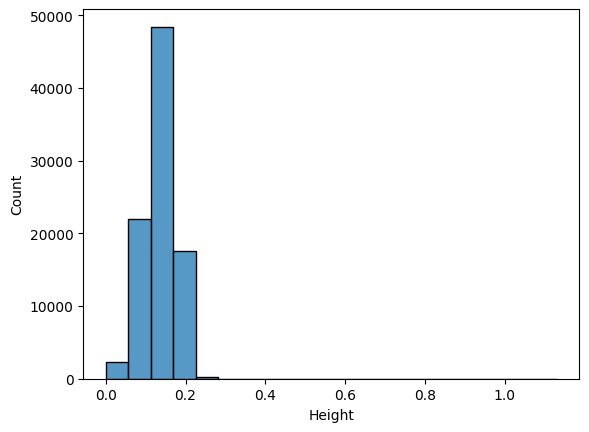

In [10]:
sns.histplot(train_df.Height, bins=20)

In [11]:
train_df.Sex.unique()

array(['F', 'I', 'M'], dtype=object)

In [12]:
f_selector = train_df.Sex == 'F'
m_selector = train_df.Sex == 'M'
i_selector = train_df.Sex == 'I'

In [13]:
train_df.Sex[f_selector]

0        F
1        F
5        F
7        F
12       F
        ..
90599    F
90600    F
90604    F
90607    F
90609    F
Name: Sex, Length: 26495, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

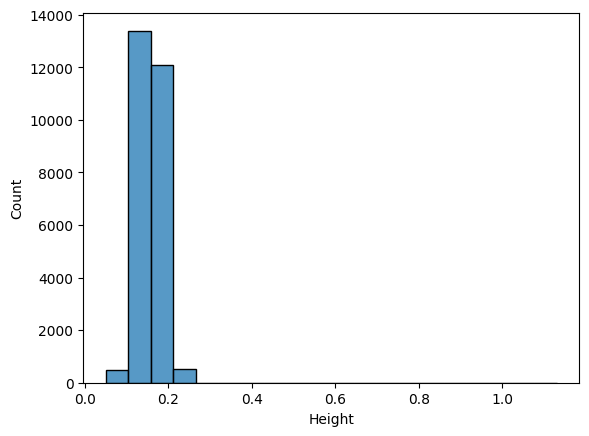

In [14]:
sns.histplot(train_df.Height[f_selector], bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

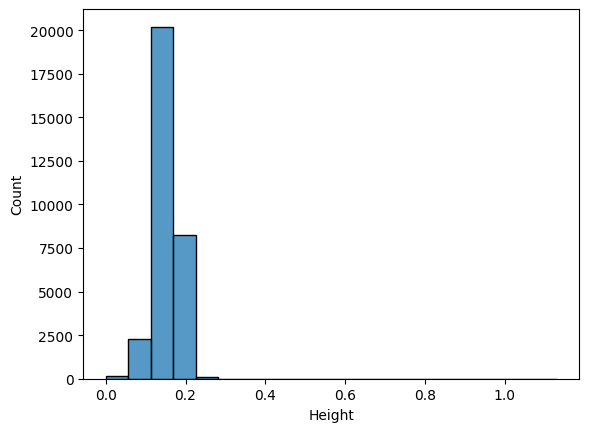

In [15]:
sns.histplot(train_df.Height[m_selector], bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

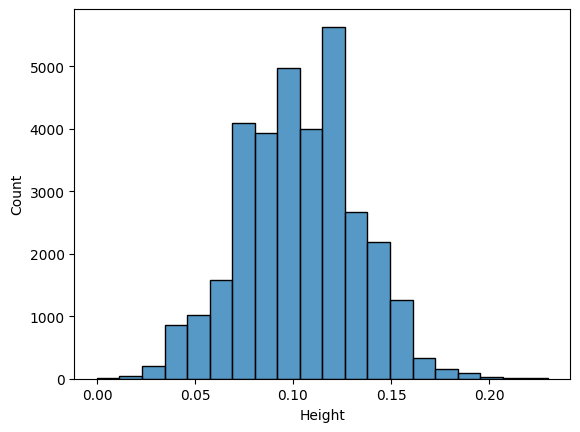

In [16]:
sns.histplot(train_df.Height[i_selector], bins=20)

Note how the height is affected by the sex

It will be interesting to see how correlated height and other measures are to rings, and then how the correlation changes when selecting by the sex.

In [17]:
train_df.Height[i_selector].count()

33093

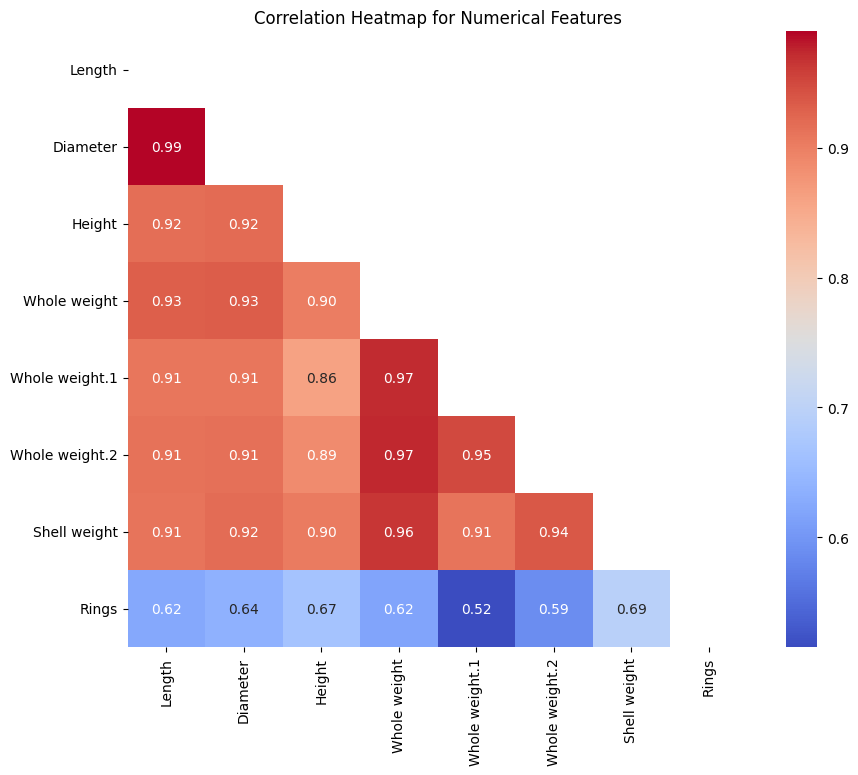

In [18]:
# Select only numerical features
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']

# Compute correlation matrix
correlation_matrix = train_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [19]:
i_height_df = train_df.Height[i_selector].to_frame().join(train_df.Rings[i_selector])
f_height_df = train_df.Height[f_selector].to_frame().join(train_df.Rings[f_selector])
m_height_df = train_df.Height[m_selector].to_frame().join(train_df.Rings[m_selector])
i_height_df.head()

,Height,Rings
2,0.025,6
4,0.130,9
8,0.040,4
9,0.125,8
13,0.110,7


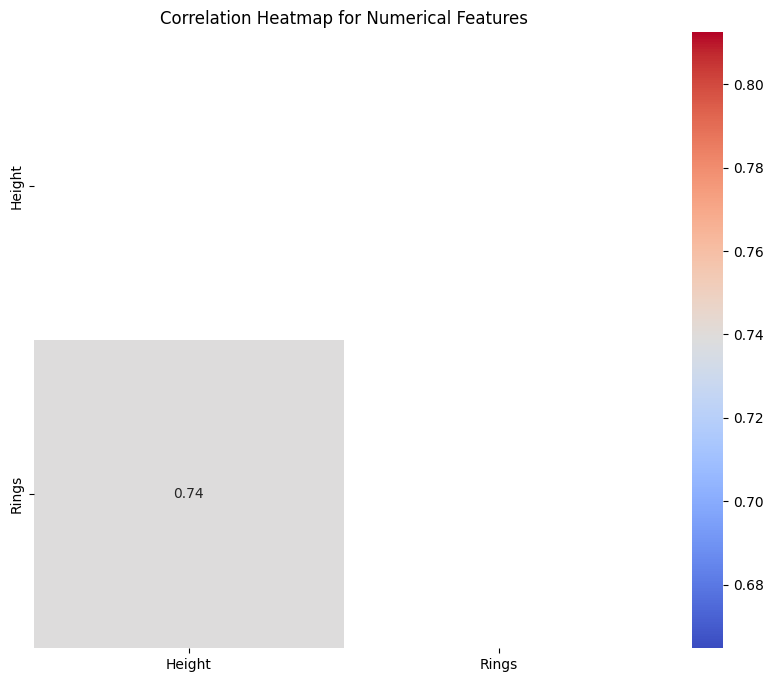

In [20]:
# Compute correlation matrix
correlation_matrix = i_height_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

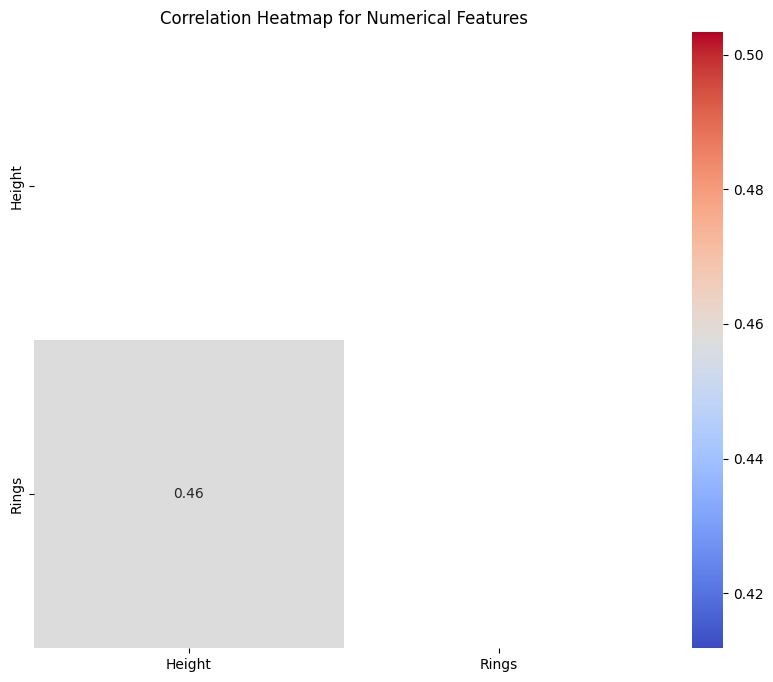

In [21]:
# Compute correlation matrix
correlation_matrix = m_height_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

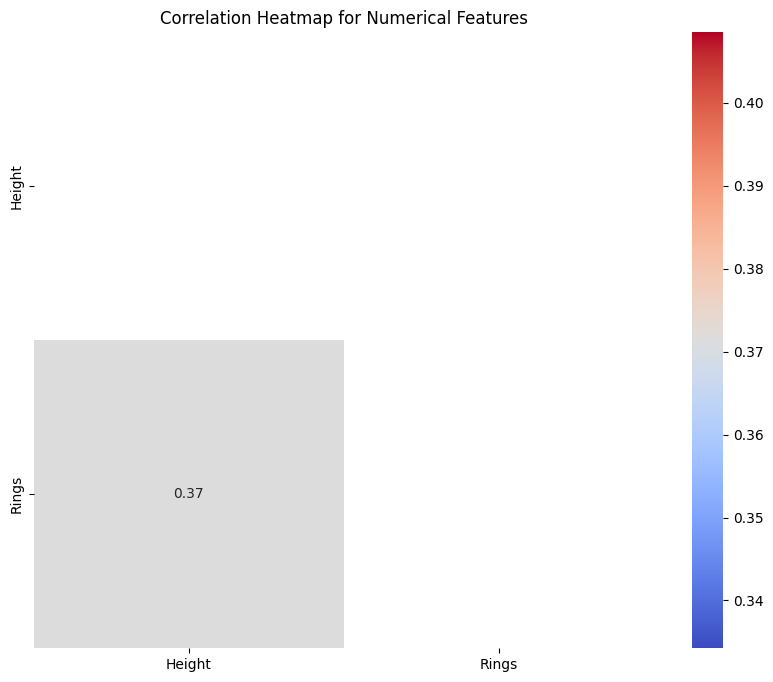

In [22]:
# Compute correlation matrix
correlation_matrix = f_height_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Turns out that correlation doesn't change much for Height/Rings by sex.

In [23]:
def corrRingsByCategories(categories, feature, data):
    selected_dfs = []
    for category in categories:
        category_df = (data[feature][category].to_frame().join(data.Rings[category]))

        # Compute correlation matrix
        correlation_matrix = category_df.corr(method='spearman')

        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
        plt.title('Correlation Heatmap for category')
        plt.show()

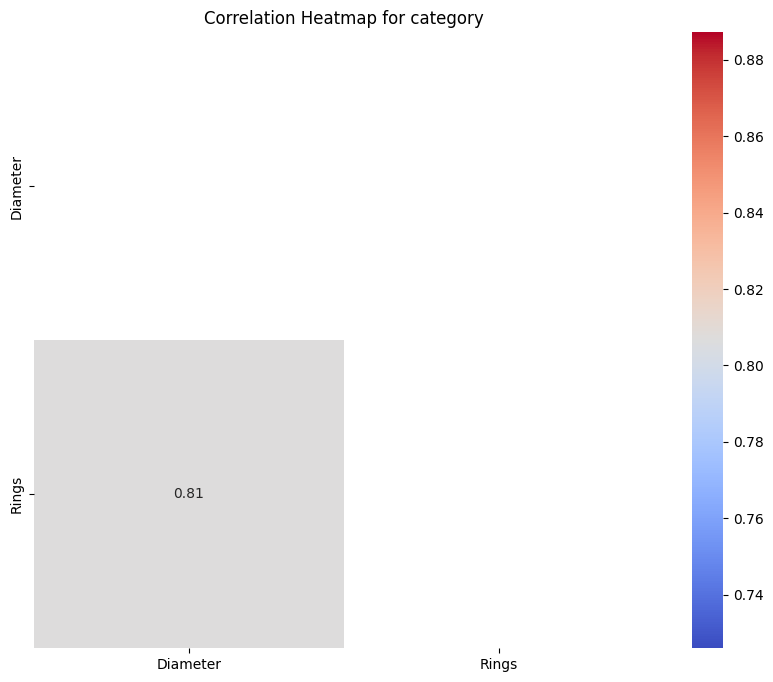

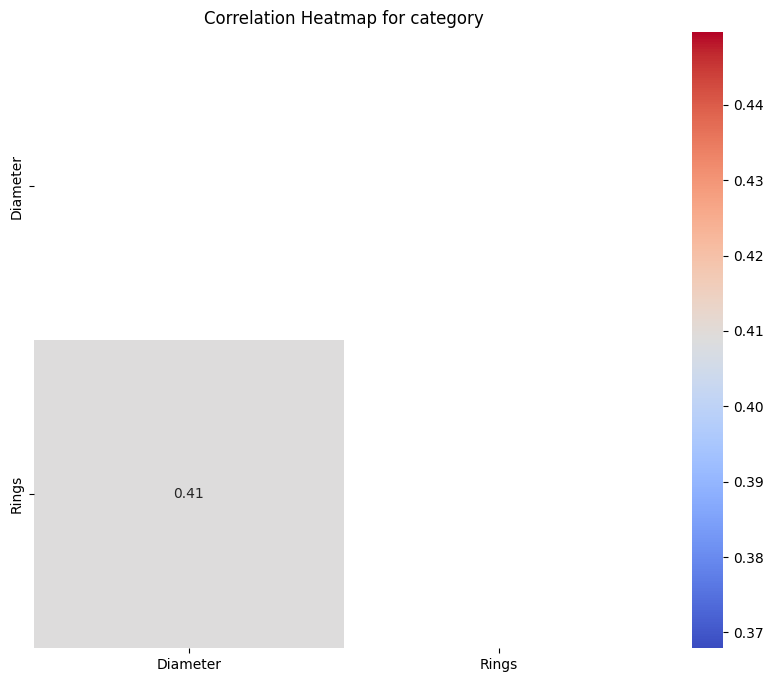

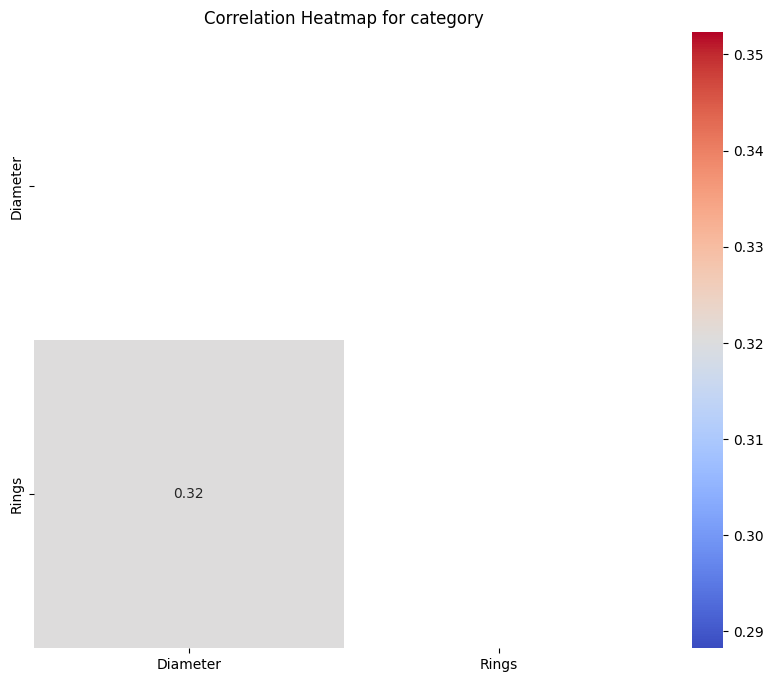

In [24]:
corrRingsByCategories([i_selector, m_selector, f_selector], 'Diameter', train_df)

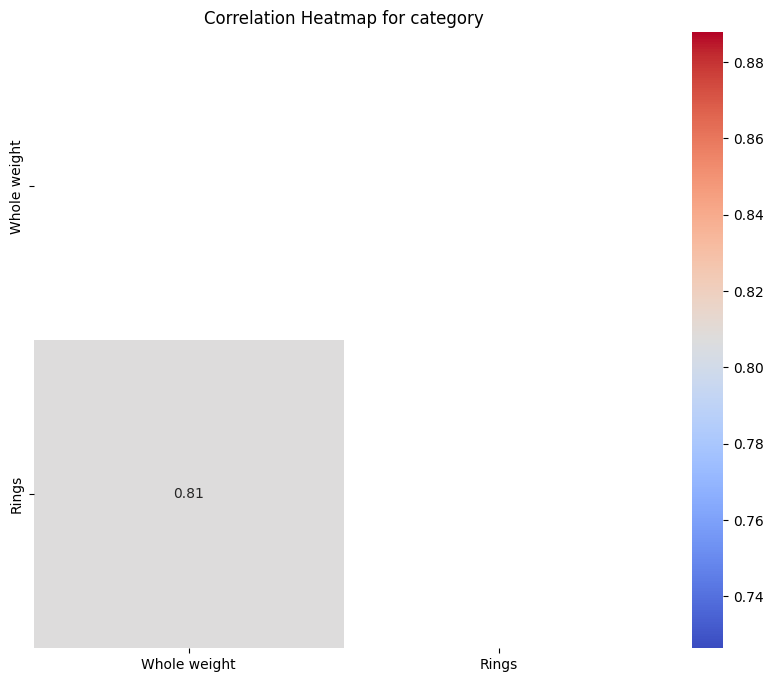

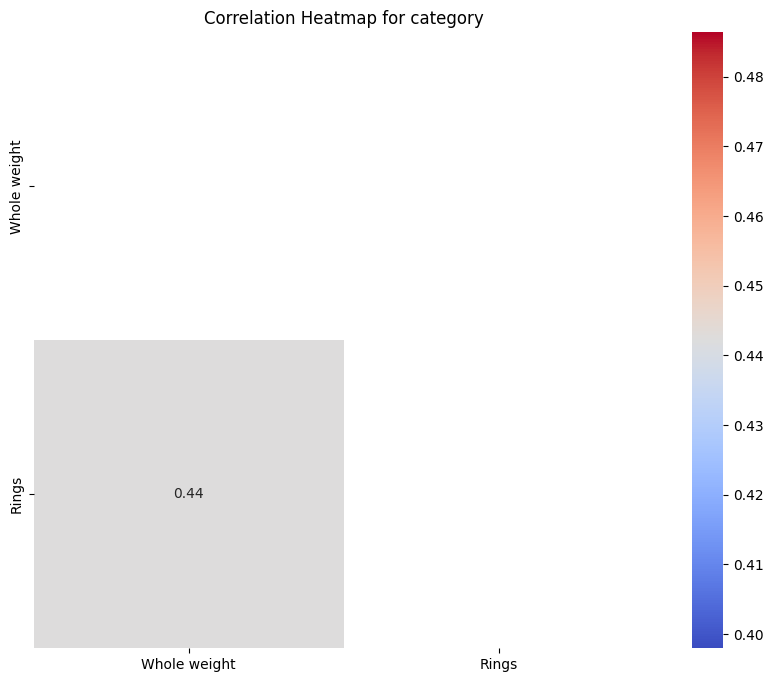

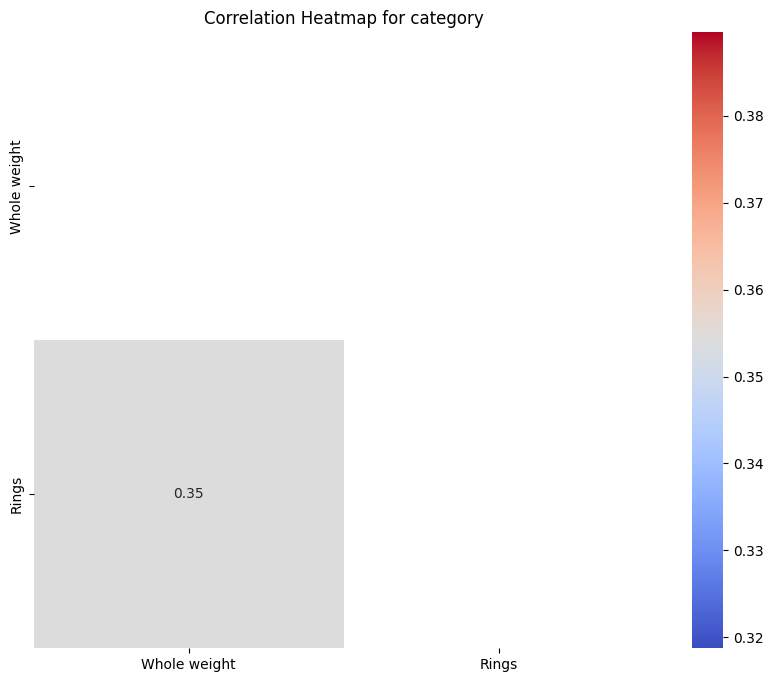

In [25]:
corrRingsByCategories([i_selector, m_selector, f_selector], 'Whole weight', train_df)

When I change the correlation to spearman I get a slightly better correlation, indicating that the relationship might not be linear...

Good, simple article on correlation:
https://data36.com/correlation-definition-calculation-corr-pandas/

In [26]:
train_df.Sex.unique()

array(['F', 'I', 'M'], dtype=object)

In [27]:
def corrByCategory(category, feature1, feature2, data):
    """
    Correlate to features (series) with respect to a category

    Parameters
    ----------
    category : string
        The name of the categorical series which will be used to subdivide the correlations
    feature1 : string
        The name of the first feature (column/series) to compare
    feature2 : string
        The name of the secord feature to compare
    data: DataFrame
        Contains all of the series represented by category, feature1, and feature2

    Returns
    -------
    No direct return.  
    Plots a (simple) heatmap showing the correlations for each feature, by category
    """
    
    # For the specifiec category, get all unique types
    categories = data[category].unique()

    # For each type/selection in the category determine the correlation
    for selection in categories:
        selector = data[category] == selection

        # Construct a dataframe consisting of the two things to compare
        category_df = (data[feature1][selector].to_frame().join(data[feature2][selector]))

        # Compute correlation using spearman to capture possible non-linearity
        correlation_matrix = category_df.corr(method='spearman')

        # Plot the heatmap
        titleString = 'Correlation between ' + feature1 + " and " + feature2 + " by " + category + ":" + selection
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
        plt.title(titleString)
        plt.show()

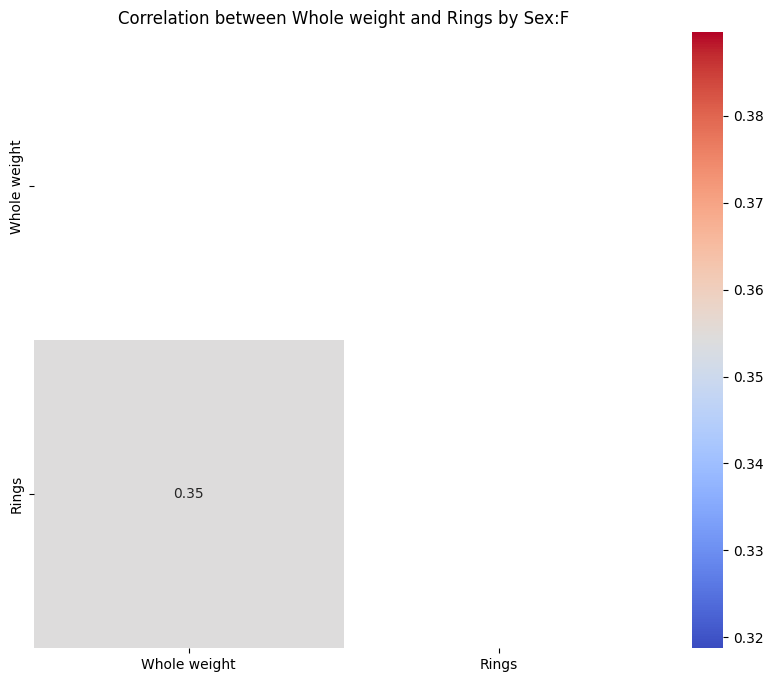

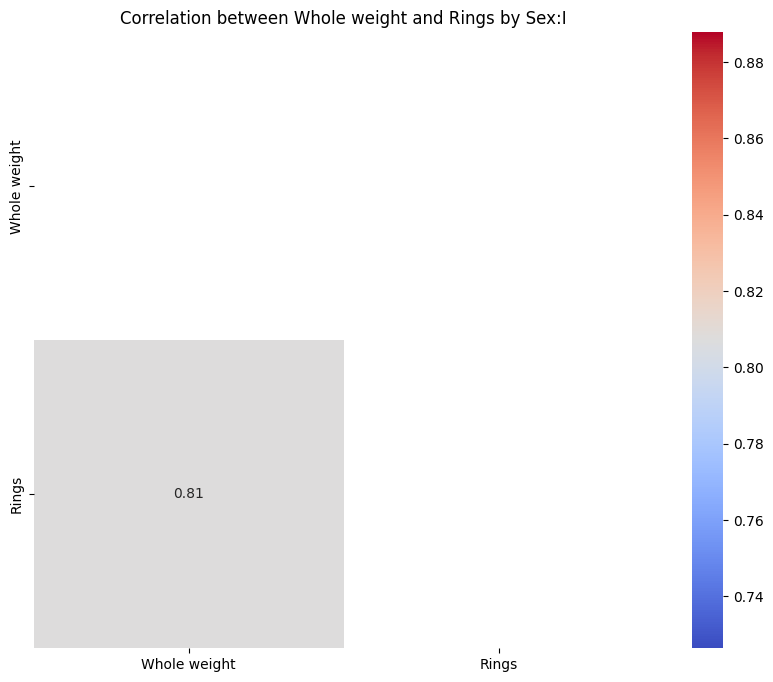

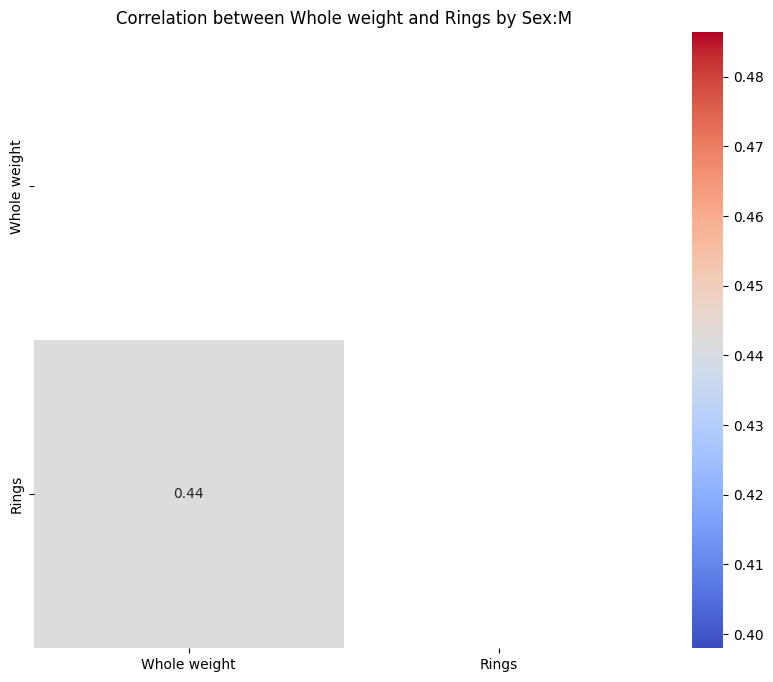

In [28]:
corrByCategory('Sex', 'Whole weight', 'Rings', train_df)

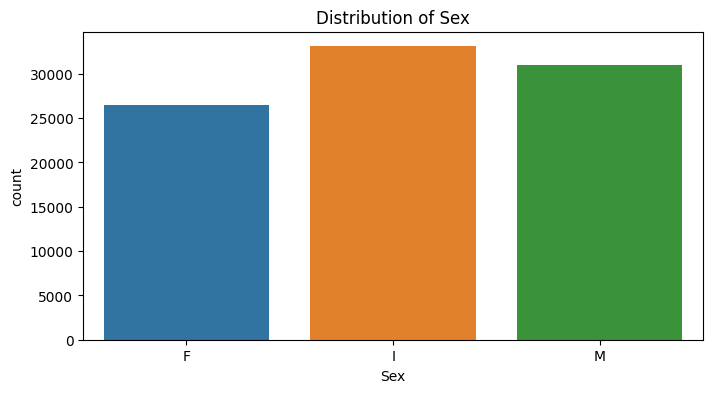

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


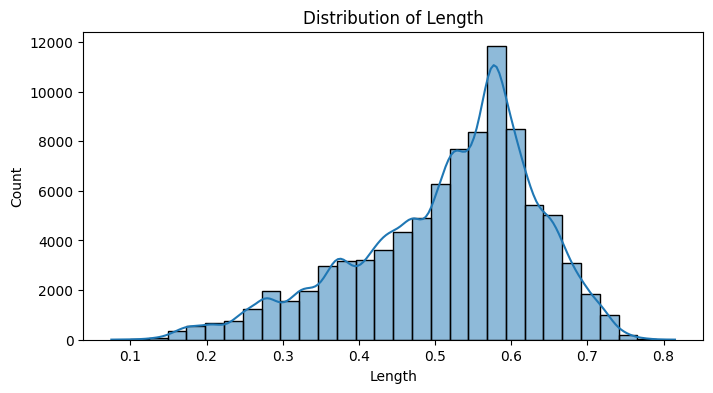

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


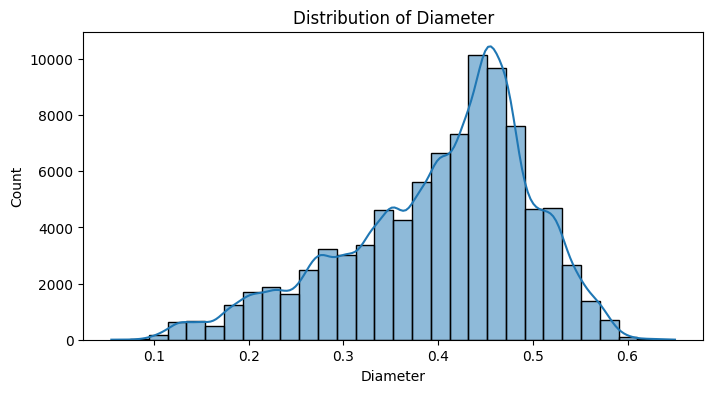

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


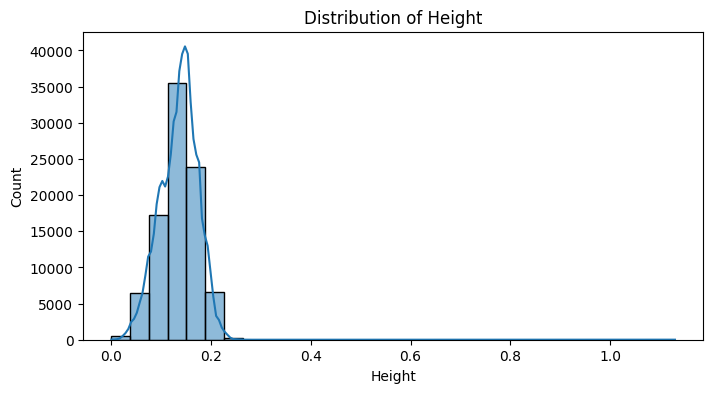

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


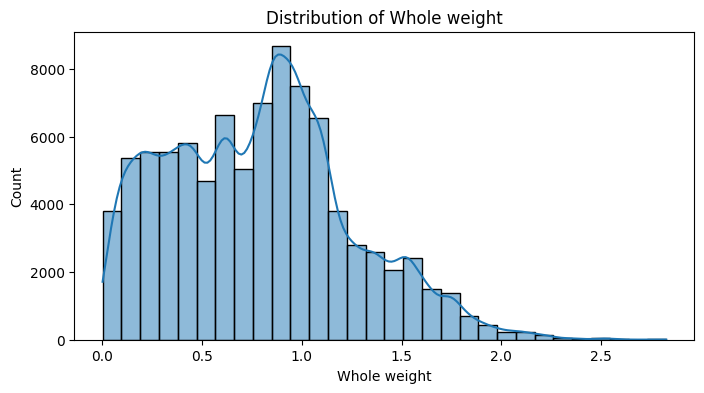

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


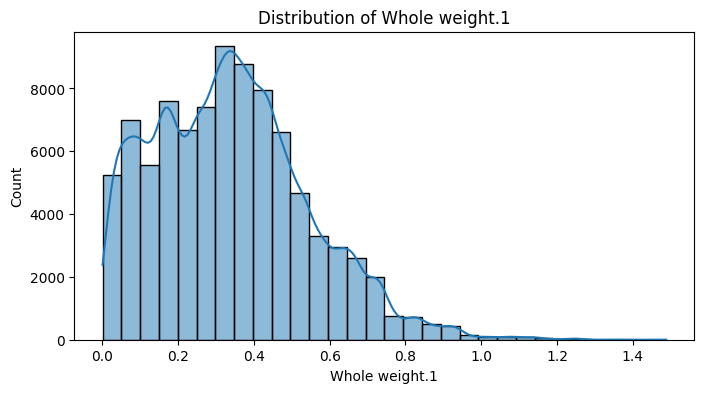

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


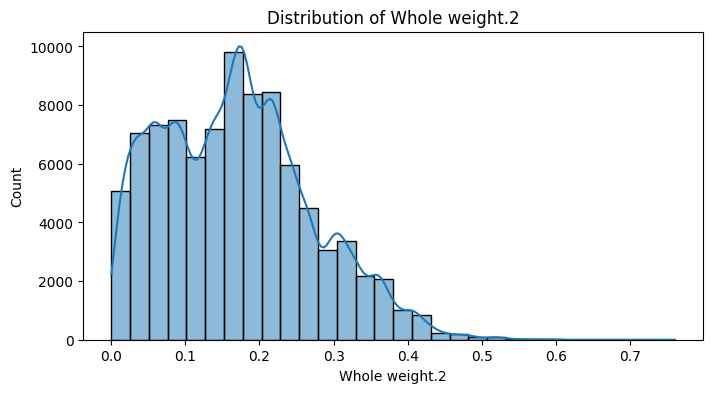

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


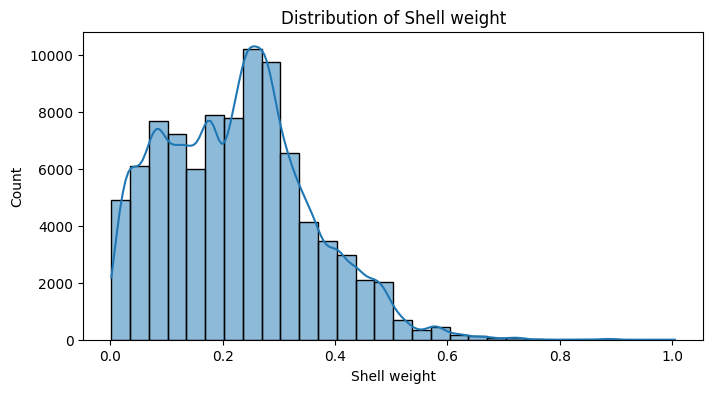

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


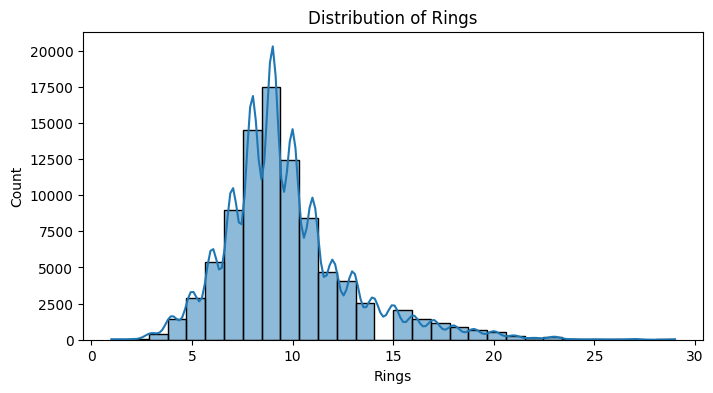

In [29]:
# Assuming df is your DataFrame
for column in (train_df.drop(['id'], axis=1)).columns:
    plt.figure(figsize=(8, 4))
    if train_df[column].dtype == 'object':  # Categorical features
        sns.countplot(x=column, data=train_df)
        plt.title(f'Distribution of {column}')
    else:  # Numerical features
        sns.histplot(train_df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
    plt.show()

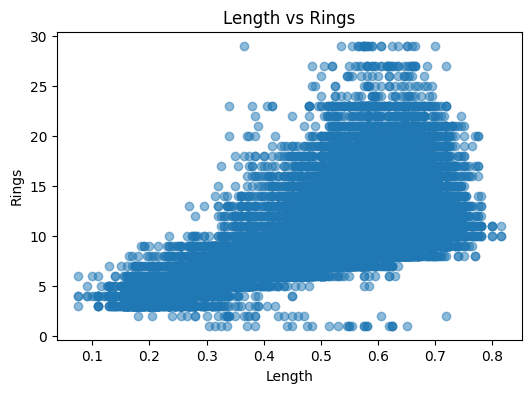

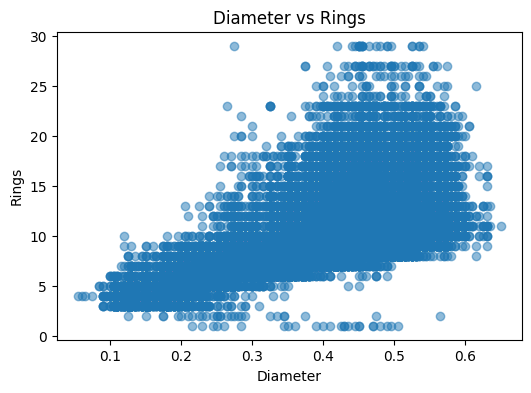

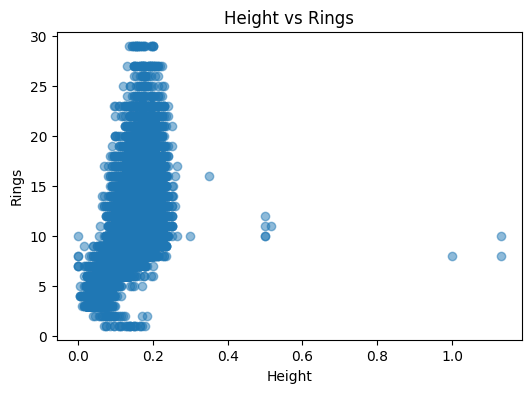

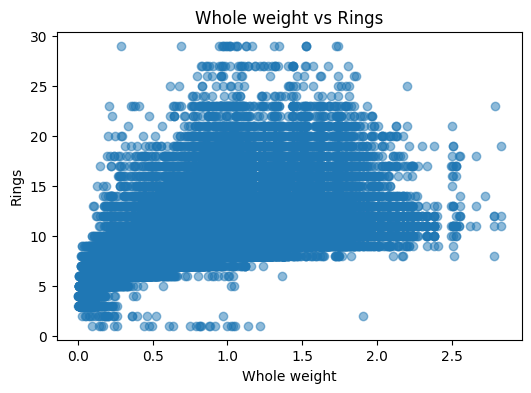

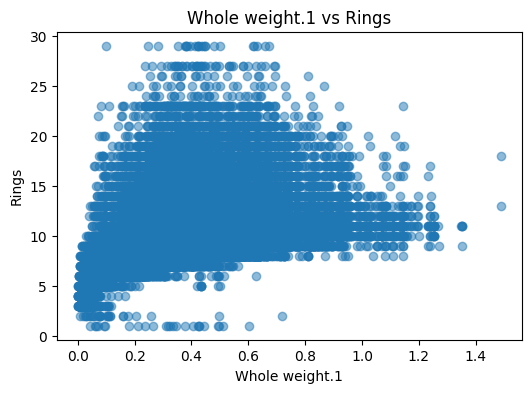

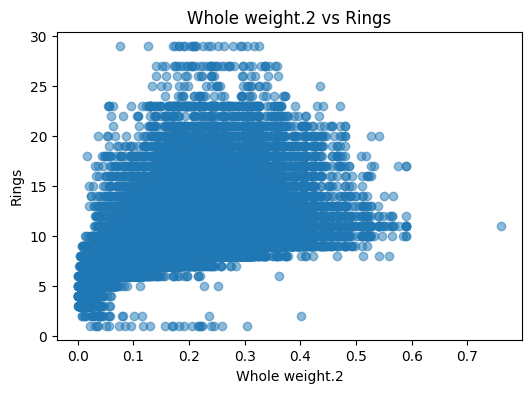

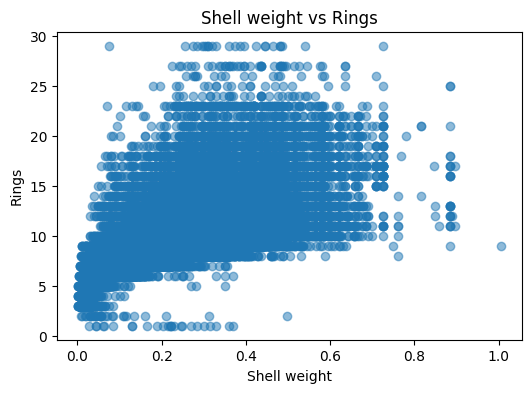

In [30]:
# List of numerical predictors
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Create scatter plots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(train_df[feature], train_df['Rings'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Rings')
    plt.title(f'{feature} vs Rings')
    plt.show()

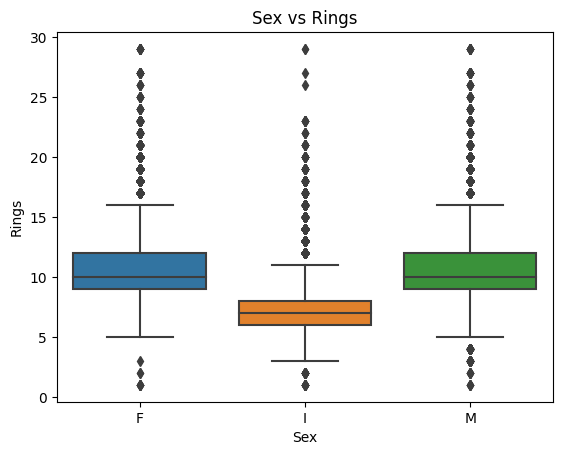

In [31]:
sns.boxplot(x='Sex', y='Rings', data=train_df)
plt.title('Sex vs Rings')
plt.show()

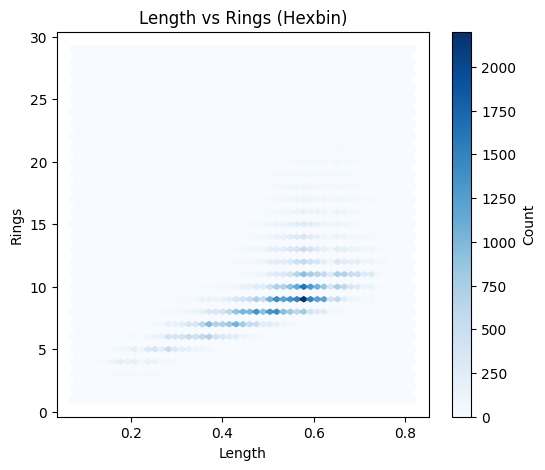

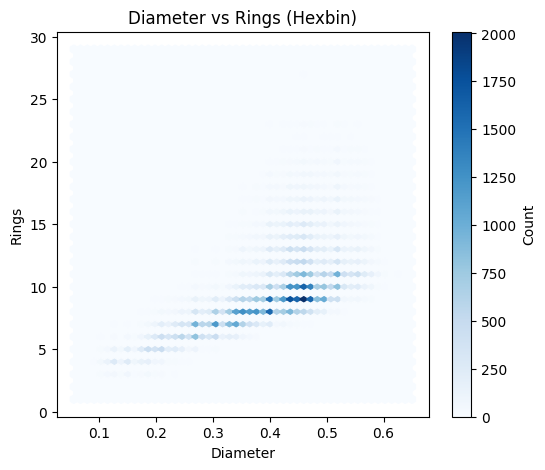

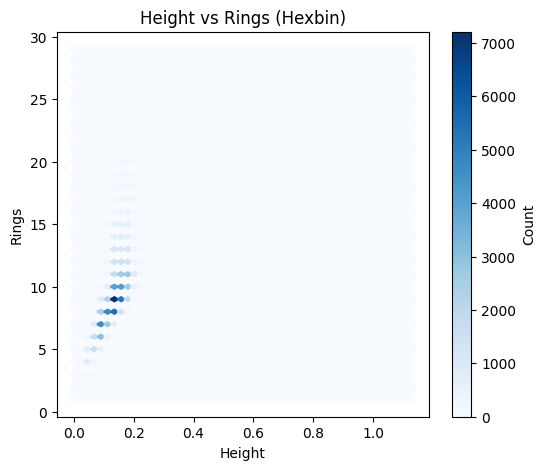

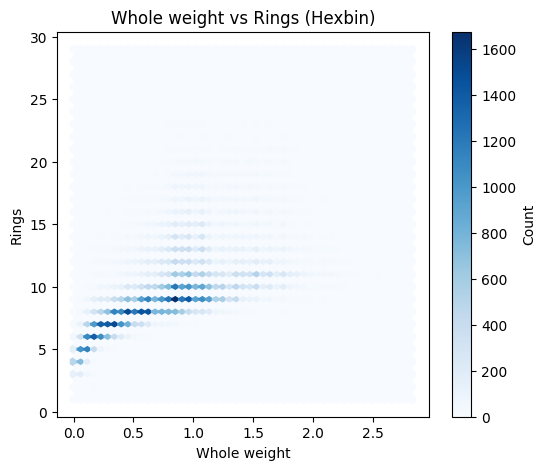

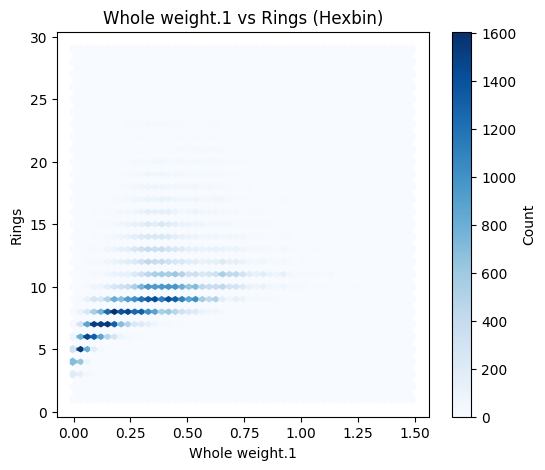

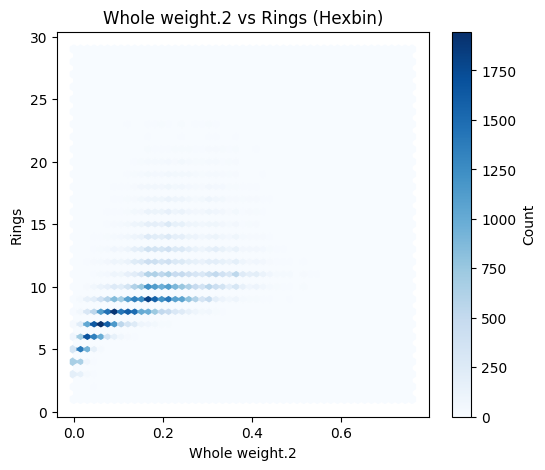

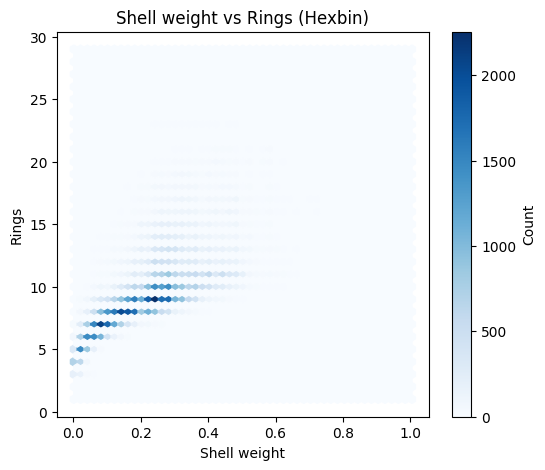

In [32]:
for feature in numerical_features:
    plt.figure(figsize=(6, 5))
    plt.hexbin(train_df[feature], train_df['Rings'], gridsize=50, cmap='Blues')
    plt.colorbar(label='Count')
    plt.xlabel(feature)
    plt.ylabel('Rings')
    plt.title(f'{feature} vs Rings (Hexbin)')
    plt.show()

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html


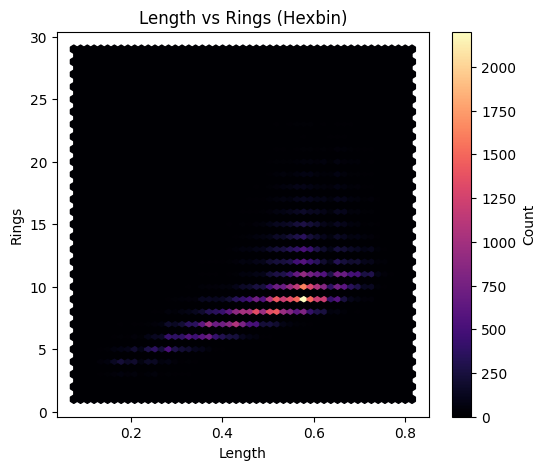

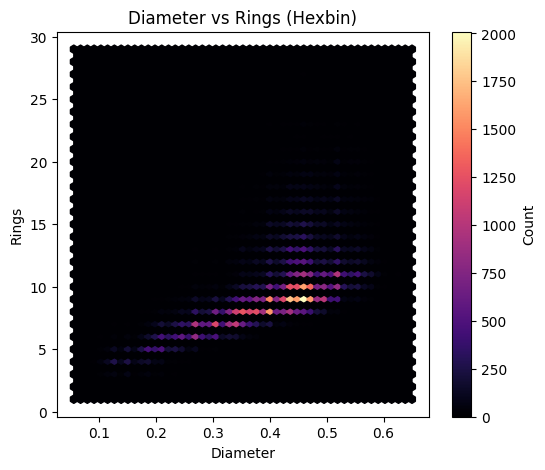

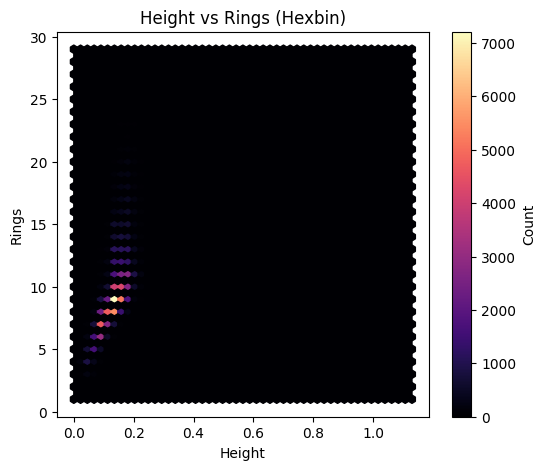

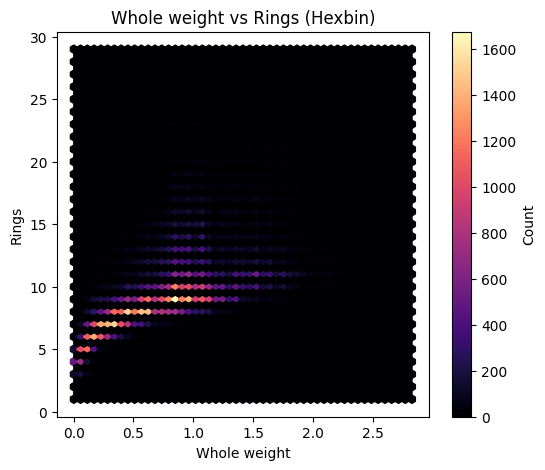

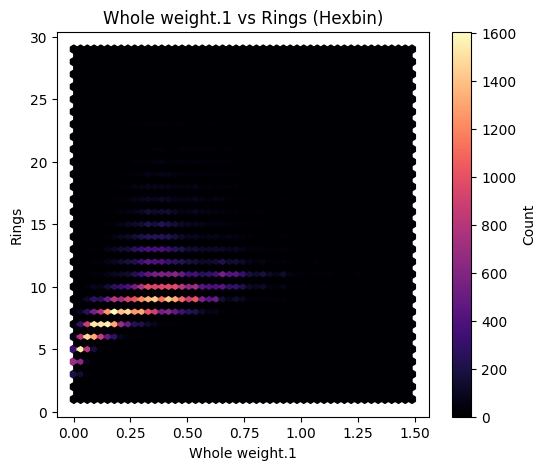

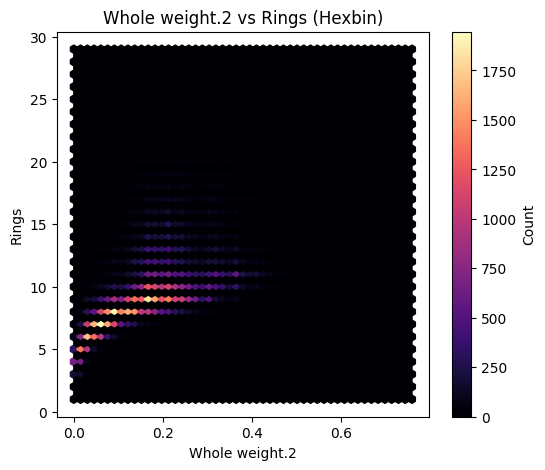

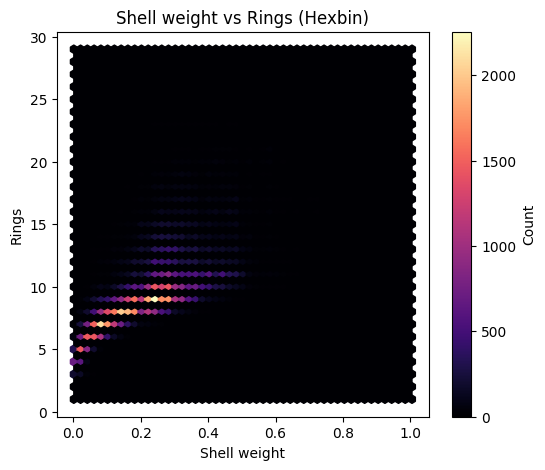

In [34]:
for feature in numerical_features:
    plt.figure(figsize=(6, 5))
    plt.hexbin(train_df[feature], train_df['Rings'], gridsize=50, cmap='magma')

    plt.colorbar(label='Count')
    plt.xlabel(feature)
    plt.ylabel('Rings')
    plt.title(f'{feature} vs Rings (Hexbin)')
    plt.show()

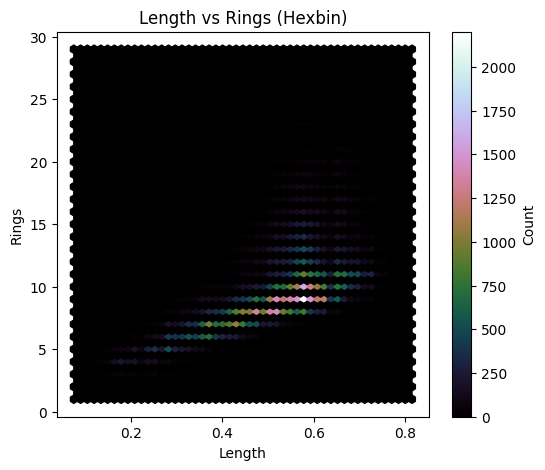

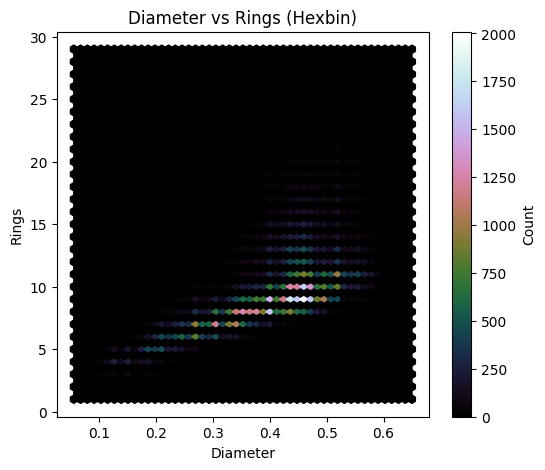

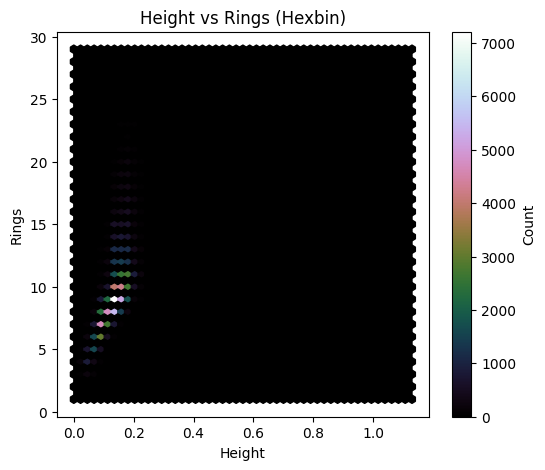

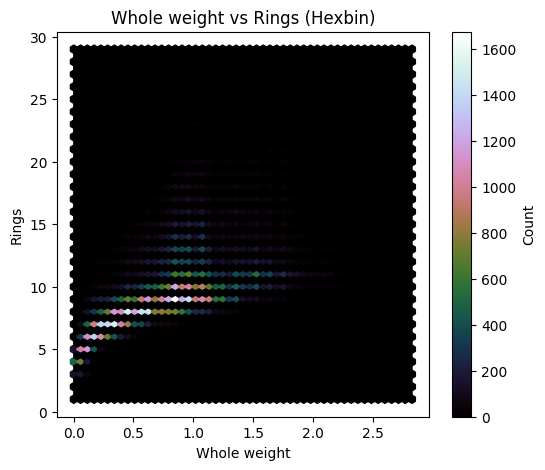

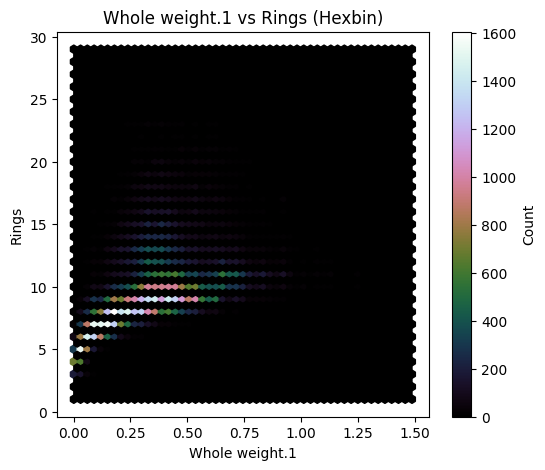

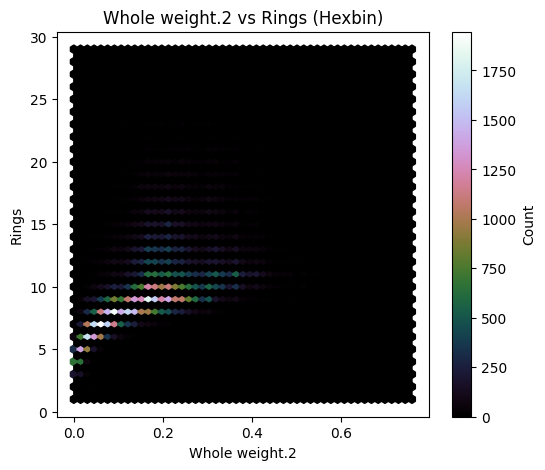

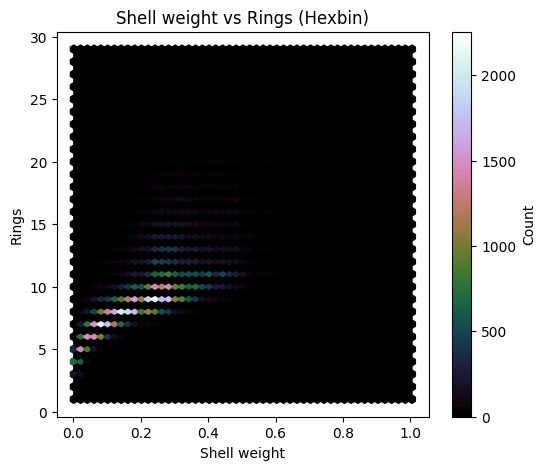

In [35]:
for feature in numerical_features:
    plt.figure(figsize=(6, 5))
    plt.hexbin(train_df[feature], train_df['Rings'], gridsize=50, cmap='cubehelix')

    plt.colorbar(label='Count')
    plt.xlabel(feature)
    plt.ylabel('Rings')
    plt.title(f'{feature} vs Rings (Hexbin)')
    plt.show()

4. Feature Selection and Engineering¶


In [36]:
# One-hot encode 'Sex'
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

# View the updated dataset
print(train_df.head())

   id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex_I  Sex_M  
0        0.2400     11  False  False  
1        0.3200     11  False  False  
2        0.0050      6   True  False  
3        0.2500     10  False   True  
4        0.1975      9   True  False  


In [37]:
# Retain only selected features
selected_features = ['Shell weight', 'Height', 'Diameter', 'Whole weight', 'Rings', 'Sex_I', 'Sex_M']
train_df_selected = train_df[selected_features]

# Confirm the updated dataset
print(train_df_selected.head())

   Shell weight  Height  Diameter  Whole weight  Rings  Sex_I  Sex_M
0        0.2400   0.150     0.430        0.7715     11  False  False
1        0.3200   0.145     0.490        1.1300     11  False  False
2        0.0050   0.025     0.110        0.0210      6   True  False
3        0.2500   0.150     0.475        0.9145     10  False   True
4        0.1975   0.130     0.425        0.7820      9   True  False


In [38]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_df_selected.drop(columns=['Rings'])  # Features
y = train_df_selected['Rings']                # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (72492, 6)
Testing set size: (18123, 6)


6. Feature Engineering/Scaling/Preprocessing¶

   https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html


In [39]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to scale
numerical_features = ['Shell weight', 'Height', 'Diameter', 'Whole weight']  # Adjust to include only numerical features

# Initialize scaler
scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Verify the scaled data
print(X_train_scaled.head())

       Shell weight    Height  Diameter  Whole weight  Sex_I  Sex_M
43718      1.030331  1.037589  1.055134      1.303539  False   True
45247      1.222442  1.562869  1.208318      1.643625  False  False
71393      0.453999  0.380989  0.953011      0.755682  False   True
51688      1.645085  1.694189  1.616808      1.629409  False   True
40681     -1.444054 -1.588811 -2.059604     -1.490420   True  False


In [40]:
# Interesting to see the data post-scaling!
X_train_scaled.describe()

,Shell weight,Height,Diameter,Whole weight
count,7.249200e+04,7.249200e+04,7.249200e+04,7.249200e+04
mean,2.195574e-17,2.227920e-16,-8.262809e-17,3.391378e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.724535e+00,-3.558612e+00,-3.540381e+00,-1.721154e+00
25%,-8.139307e-01,-6.695711e-01,-5.788269e-01,-8.080600e-01
50%,-7.066126e-03,1.183491e-01,2.381534e-01,2.301978e-02
75%,6.076879e-01,6.436292e-01,6.977049e-01,6.072360e-01
max,5.986785e+00,2.611972e+01,2.535911e+00,4.453987e+00


7. Model Training¶

Linear Regression Metrics:
R^2 Score: 0.546
Mean Absolute Error (MAE): 1.478
Root Mean Squared Error (RMSE): 2.159

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression Metrics:")
print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred, squared=False):.3f}")

Linear Regression Metrics:
R^2 Score: 0.546
Mean Absolute Error (MAE): 1.478
Root Mean Squared Error (RMSE): 2.159


https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)  # No scaling needed for tree-based models

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Metrics:")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred_rf, squared=False):.3f}")

Random Forest Metrics:
R^2 Score: 0.568
Mean Absolute Error (MAE): 1.452
Root Mean Squared Error (RMSE): 2.108


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=50)

# Train the model
rf_model.fit(X_train, y_train)  # No scaling needed for tree-based models

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Metrics:")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred_rf, squared=False):.3f}")

Random Forest Metrics:
R^2 Score: 0.533
Mean Absolute Error (MAE): 1.509
Root Mean Squared Error (RMSE): 2.191


In [45]:
y_pred_rf

array([ 8.5,  7.3, 10. , ...,  9.2, 10. , 10.1])

https://www.datacamp.com/tutorial/random-forests-classifier-python
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestRegressor()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)